In [1]:
# General important stuff
import warnings
warnings.filterwarnings('ignore')
import control as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyphotonicsims.control_systems.control_core import *
from pyphotonicsims.control_systems.calculate_laser_noise import *
from pyphotonicsims.laser_dynamics.brillouin_laser import *

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

## Stimulated Brillouin scattering (SBS) laser model is based on Ryan O. Behunin's paper.
#### Behunin, Ryan O., et al. "Fundamental noise dynamics in cascaded-order Brillouin lasers." Physical Review A 98.2 (2018): 023832.
Cascaded rate equations
$$\frac{da_m}{dt} = (i\Delta\omega - \gamma/2 + \mu(|a_{m-1}|^2 - |a_{m+1}|^2))a_m + \delta_{m0}i\sqrt(\gamma_{ex})F$$
#### Laser metrics caculation: cavity Q, threshold $P_{th}$, efficiency $\eta$, minimum ST linewidth $\nu_{ST}$
$$P_{th} = \frac{h\nu\gamma^3}{8\mu\gamma_{ex}} $$
$$\eta_{S1} = (\frac{\gamma_{ex}}{\gamma})^2$$
$$\nu_{ST,min} = \frac{n_0\gamma}{2\pi}$$

In [2]:
# 400 MQ
r = [0.9, 0.4]          # loss rates = [intrinsic, coupling] in MHz
L = 2*np.pi*11.787e-3   # cavity length in meter
vST_min = 0.3           # minimum S1 ST linewidth in Hz

# # 70 MQ
# r = [1.8, 1.8]
# L = 2*np.pi*11.787e-3
# vST_min = 0.7

# # 30 MQ OR3
# r = [3.5, 3.5]
# L = 2*np.pi*11.787e-3
# vST_min = 0.7

# # 30 MQ OR3
# r = [3.5, 3.5]
# L = 2*np.pi*11.787e-3
# vST_min = 0.7

# # 700MQ etched silica
# r = [3.5, 3.5]
# L = 2*np.pi*3e-3
# vST_min = 0.09

# # 700MQ TM at 1570
# r = [0.32, 0.056]
# L = 2*np.pi*11.787e-3
# vST_min = 0.15

# # double-ring 40nm TE SBS at 1550
# r = [0.8, 0.8]
# L = 2*np.pi*11.787e-3
# vST_min = 0.2

# # double-ring 80nm TM SBS at 1570
# r = [1.7, 1.2]
# L = 2*np.pi*11.787e-3
# vST_min = 0.5

# # 800MQ 4 meter fiber cavity at 1550
# r = [0.30, 0.40]
# L = 2*np.pi*11.787e-3
# vST_min = 0.007

# # 100MQ 4 meter coil
# r = [1.0, 1.0]
# L = 4.
# vST_min = 0.01

sbs = SBSLaser(ord = 4, r = r, L = L, vST_min = vST_min)

-----------------REPORT------------------
Cavity Q:      148.78 M
P_th:          1.065 mW
min FLW:       0.300 Hz
S1 efficiency: 0.095
rho:           6.289
GB:            0.094


#### Pump power sweep from 0 mW to $10\times P_{th}$, showing thresholding and linewidth narrowing behaviors

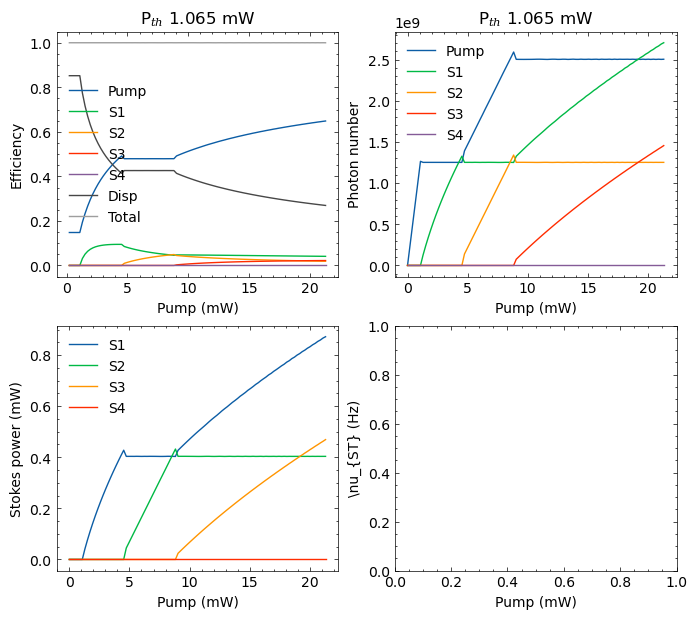

In [3]:
Px = np.linspace(0,20*sbs.P_th,100)
sbs.pump_sweep_visulization(Px)

#### Pump laser detuning sweep, showing thresholding and linewidth narrowing behaviors

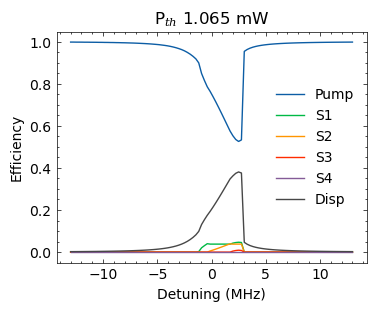

In [4]:
# [resoance heating redshift in MHz/mW, absoption loss fraction in total intrinsic loss
abs_heating = [1.0, 0.1] 
dfx = np.linspace(-10, 10, 100)*sum(r)
sbs.detuning_sweep_visulization(dfx, 10*sbs.P_th, abs_heating)

#### SBS phase/frequency matching plot
 - Integer multiple of resonator FSR, $m\Delta\nu_{FSR} = \frac{mc}{n_g L}$, is almost a constant compared to the wavelength dependence of the SBS frequency shift, despite of very slight dispersion $n_g(\lambda)$ $$m\Delta\nu_{FSR} = \frac{mc}{n_g L}$$
 - SBS frequency shift $$\Omega_B(\lambda) = \frac{2\pi n_g V_{ac}}{\lambda}$$
 - Wheather or not $m\Delta\nu_{FSR}$ is right on target of $\Omega_B(\lambda)$, a Brillouin gain can be estimated with a mismatch term $\Delta\Omega = m\Delta\nu_{FSR} - \Omega_B$, and $G_B(\Delta\Omega_B)$ peaks at $\Delta\Omega_B = 0$ or $m\Delta\nu_{FSR} = \Omega_B$
 
<img src="./figures/SBS_phase_matching.png" width="350"/> <img src="./figures/GB_spectrum.png" width="300"/>

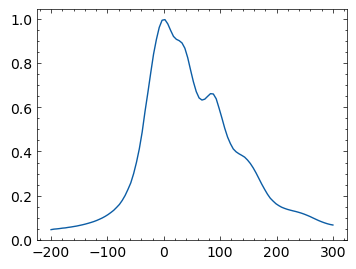

In [10]:
df = pd.read_csv('data/SBS_gain_spectrum_comsol.csv')
df = df.values
dfx = np.linspace(-200.,300,100)
GBx = GB_spectrum_silica(dfx, ifinterp = True, df1 = df[:,0], GB1 = df[:,1])
plt.plot(dfx, GBx)

#### Laser current modulation frequency response, in terms of carrier density, photon density and output power 

In [6]:
# n1,s1,p1,H,freqx = laser.freqresp_current_mod(laser.I_th*2,freq1 = 1e4,freq2 = 1e11)
# plt.subplot(211)
# plt.loglog(freqx,abs(n1))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('dN/dI')
# plt.subplot(212)
# plt.loglog(freqx,abs(p1))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('dP/dI (mW/mA)')